# Exploratory data analysis on NewYork CitiBike data

### Simple SQL queries to explore NewYork CitiBike data
### Simple time series forecasting using Prophet

In [36]:
# set up authentication
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


## Reading stations table

In [ ]:
%%bigquery --project mybigqueryproject-295419 stations
SELECT
  *
FROM
  `bigquery-public-data.new_york.citibike_stations`

In [ ]:
stations.head(5)

,station_id,name,short_name,latitude,longitude,region_id,rental_methods,capacity,num_bikes_available,num_bikes_disabled,num_docks_available,num_docks_disabled,is_installed,is_renting,is_returning,last_reported,eightd_has_available_keys,eightd_has_key_dispenser
0,3608,Coming Soon: 5 St & 51 Ave,6137.04,40.742374,-73.956600,71.0,"KEY,CREDITCARD",0,0,0,0,0,False,False,False,1970-01-01 00:00:00+00:00,False,False
1,3628,Coming Soon: Lenox Ave & W 117 St,7655.22,40.802557,-73.949078,71.0,"KEY,CREDITCARD",0,0,0,0,0,False,False,False,1970-01-01 00:00:00+00:00,False,False
2,3627,Coming Soon: 31 St & 30 Ave,6923.13,40.767006,-73.921406,71.0,"KEY,CREDITCARD",0,0,0,0,0,False,False,False,1970-01-01 00:00:00+00:00,False,False
3,3416,7 Ave & Park Pl,4125.07,40.677615,-73.973243,71.0,"KEY,CREDITCARD",0,0,0,0,0,True,False,False,1970-01-01 00:00:00+00:00,False,False
4,3664,North Moore St & Greenwich St,5470.12,40.720195,-74.010301,71.0,"KEY,CREDITCARD",0,0,0,0,0,False,True,True,1970-01-01 00:00:00+00:00,False,False


In [ ]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817 entries, 0 to 816
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype              
---  ------                     --------------  -----              
 0   station_id                 817 non-null    int64              
 1   name                       817 non-null    object             
 2   short_name                 817 non-null    object             
 3   latitude                   817 non-null    float64            
 4   longitude                  817 non-null    float64            
 5   region_id                  813 non-null    float64            
 6   rental_methods             817 non-null    object             
 7   capacity                   817 non-null    int64              
 8   num_bikes_available        817 non-null    int64              
 9   num_bikes_disabled         817 non-null    int64              
 10  num_docks_available        817 non-null    int64              
 11  num_do

## Reading trips table

In [ ]:
%%bigquery --project mybigqueryproject-295419 trips
SELECT
  *
FROM
  `bigquery-public-data.new_york.citibike_trips`
LIMIT 10

In [ ]:
trips.head(5)

,tripduration,starttime,stoptime,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,10274,2016-04-24 22:36:40+00:00,2016-04-25 01:27:54+00:00,263,Elizabeth St & Hester St,40.717290,-73.996375,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,16458,Customer,NaN,unknown
1,111769,2016-02-08 19:27:15+00:00,2016-02-10 02:30:04+00:00,249,Harrison St & Hudson St,40.718710,-74.009001,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,16860,Subscriber,1966.0,male
2,547,2016-05-02 17:52:21+00:00,2016-05-02 18:01:29+00:00,514,12 Ave & W 40 St,40.760875,-74.002777,3240,NYCBS Depot BAL - DYR,0.000000,0.000000,22094,Subscriber,1975.0,male
3,152978,2016-02-22 19:22:07+00:00,2016-02-24 13:51:46+00:00,250,Lafayette St & Jersey St,40.724561,-73.995653,3019,NYCBS Depot - DEL,40.716633,-73.981933,17943,Subscriber,1969.0,male
4,100569,2015-12-17 10:24:19+00:00,2015-12-18 14:20:29+00:00,417,Barclay St & Church St,40.712912,-74.010202,3019,NYCBS Depot - DEL,40.716633,-73.981933,22674,Subscriber,1989.0,male


In [ ]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   tripduration             10 non-null     int64              
 1   starttime                10 non-null     datetime64[ns, UTC]
 2   stoptime                 10 non-null     datetime64[ns, UTC]
 3   start_station_id         10 non-null     int64              
 4   start_station_name       10 non-null     object             
 5   start_station_latitude   10 non-null     float64            
 6   start_station_longitude  10 non-null     float64            
 7   end_station_id           10 non-null     int64              
 8   end_station_name         10 non-null     object             
 9   end_station_latitude     10 non-null     float64            
 10  end_station_longitude    10 non-null     float64            
 11  bikeid                   10 non-nul

## Date range of the trips table

In [ ]:
%%bigquery --project mybigqueryproject-295419 start_end
select min(starttime), max(starttime)
from `bigquery-public-data.new_york_citibike.citibike_trips`

In [ ]:
print('First and last timestamp of trips table: ', start_end.iloc[0][0], start_end.iloc[0][1])

First and last timestamp of trips table:  2013-07-01 00:00:00 2018-05-31 23:59:59.606000


## Number of trips every generation take over every year

In [ ]:
%%bigquery --project mybigqueryproject-295419 trend_by_generation

SELECT
  EXTRACT(year FROM starttime) AS year,
  COUNT(CASE WHEN birth_year>= 1940 AND birth_year < 1959 THEN 1 END) AS Boomer,
  COUNT(CASE WHEN birth_year>= 1960 AND birth_year < 1979 THEN 1 END) AS Gen_X,
  COUNT(CASE WHEN birth_year>= 1980 AND birth_year < 1994 THEN 1 END) AS Gen_Y,
  COUNT(CASE WHEN birth_year>= 1995 AND birth_year < 2012 THEN 1 END) AS Gen_Z
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
HAVING year is NOT NULL
ORDER BY year ASC

In [ ]:
trend_by_generation.columns

Index(['year', 'Boomer', 'Gen_X', 'Gen_Y', 'Gen_Z'], dtype='object')

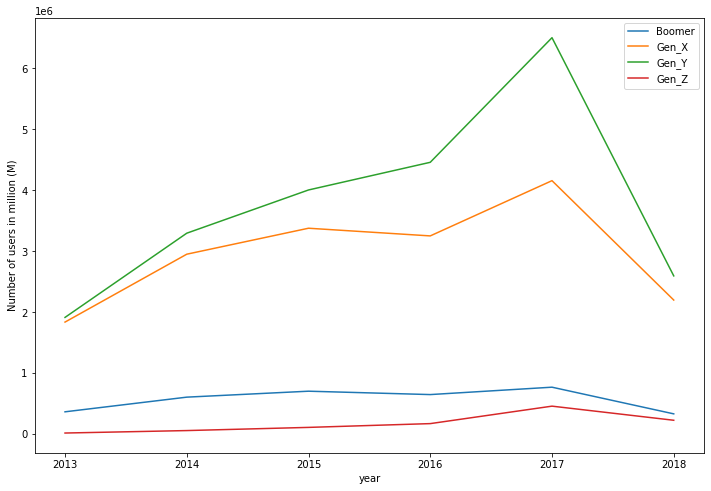

In [ ]:
import matplotlib.pyplot as plt
trend_by_generation.plot(x= 'year', y=['Boomer', 'Gen_X', 'Gen_Y', 'Gen_Z'], figsize=(12, 8))
plt.ylabel('Number of users in million (M)')
plt.show()

In [ ]:
%%bigquery --project mybigqueryproject-295419 trip_duration_by_gender

SELECT
  EXTRACT(year FROM starttime) AS year,
  SUM(CASE WHEN gender='female' THEN tripduration END)/60*60 AS Male_ride_time,
  SUM(CASE WHEN gender='male' THEN tripduration END)/60*60 AS Female_ride_time
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY year
HAVING year is NOT NULL
ORDER BY year DESC

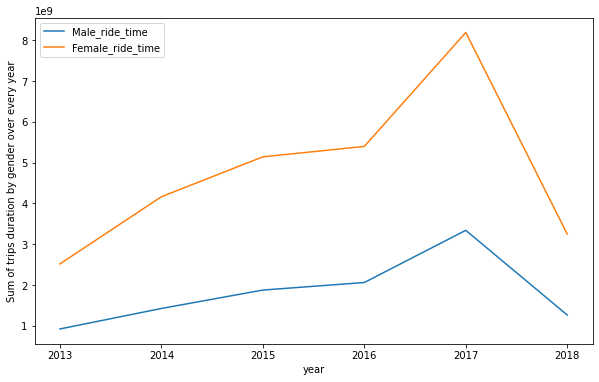

In [ ]:
trip_duration_by_gender.plot(x='year', y=['Male_ride_time', 'Female_ride_time'], figsize=(10, 6))
plt.ylabel('Sum of trips duration by gender over every year')
plt.show()

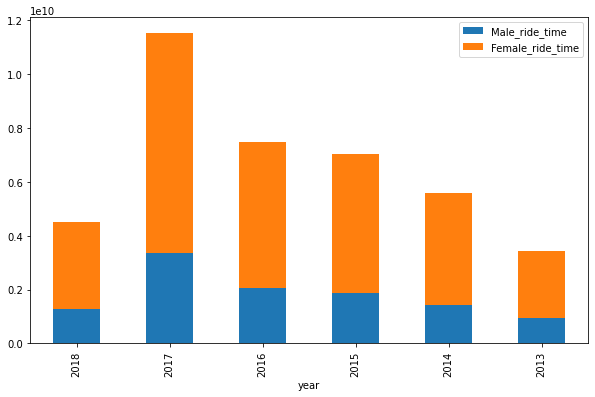

In [ ]:
trip_duration_by_gender.plot(x='year', y=['Male_ride_time', 'Female_ride_time'], kind='bar', stacked=True, figsize=(10, 6))

### Average trip duration for every month

In [ ]:
%%bigquery --project mybigqueryproject-295419 average_trip_duration_per_month

SELECT
  EXTRACT(month FROM starttime) AS month,
  EXTRACT(year FROM starttime) AS year,
  AVG(tripduration)/60 AS avg_duration_in_minutes
FROM
  `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE EXTRACT(year FROM starttime) in (2014, 2015)
GROUP BY year ,month
HAVING month is NOT NULL
ORDER BY year, month

In [ ]:
average_trip_duration_per_month

,month,year,avg_duration_in_minutes
0,1,2014,12.232816
1,2,2014,14.575330
2,3,2014,11.925942
3,4,2014,13.861805
4,5,2014,14.666757
5,6,2014,14.870667
6,7,2014,14.334734
7,8,2014,14.740030
8,9,2014,14.973644
9,10,2014,14.728278


year
2014    AxesSubplot(0.125,0.125;0.775x0.755)
2015    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

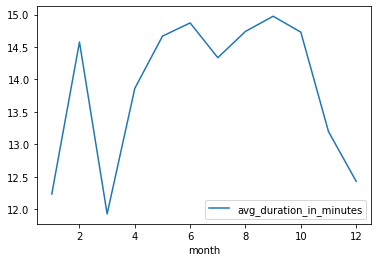

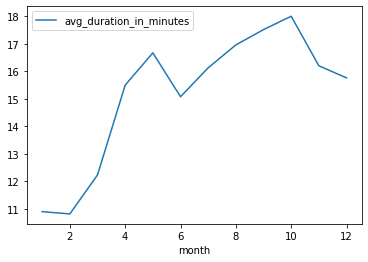

In [ ]:
average_trip_duration_per_month.groupby('year').plot(x='month', y='avg_duration_in_minutes')

Trying to find out if the trend was similar through whole year in 2014 and 2015 which we had data (almost) over the whole year. It cas be seen  that there was a big rise from April onwards in both years and the popularity decreased fron October to the end of the year.

### Which bikes were used most

In [ ]:
%%bigquery --project mybigqueryproject-295419 bikes

SELECT
  bikeid,
  count(bikeid) as times_used
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
GROUP BY bikeid
ORDER By times_used DESC

In [ ]:
bikes.head(10)

,bikeid,times_used
0,18104.0,7222
1,15731.0,7146
2,19455.0,7076
3,17526.0,7030
4,16158.0,7025
5,17955.0,6988
6,19633.0,6963
7,20233.0,6962
8,17289.0,6960
9,17747.0,6948


## From which stations the most used bike was taken mostly

In [ ]:
%%bigquery --project mybigqueryproject-295419 bike_18104

SELECT
  start_station_id,
  SUM(CASE WHEN bikeid = 18104 THEN 1 END) AS bike_18104_trips
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE bikeid = 18104
GROUP BY start_station_id
ORDER BY bike_18104_trips DESC

In [ ]:
bike_18104.head(10)

,start_station_id,bike_18104_trips
0,519,74
1,435,66
2,497,60
3,293,58
4,382,56
5,426,51
6,2006,50
7,402,48
8,151,48
9,521,47


## Popular routes

In [ ]:
%%bigquery --project mybigqueryproject-295419 popular_routes

SELECT
  start_station_id,
  end_station_id,
  count(*) AS number_routes
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE start_station_id != end_station_id
GROUP BY start_station_id, end_station_id
ORDER BY number_routes DESC

In [ ]:
popular_routes.head()

## Time series forecasting for NewYork citibikes

In [73]:
import pandas as pd

# Check for Facebook Prophet
# if not exists then install; takes ~3 minutes
try:
  from fbprophet import Prophet
except ImportError:
  !pip install pystan
  !pip install fbprophet

from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
from IPython import display
display.clear_output()

In [38]:
%%bigquery --project mybigqueryproject-295419 data

SELECT 
  DATE(starttime) AS ds,
  COUNT(*) AS y
FROM `bigquery-public-data.new_york_citibike.citibike_trips`
WHERE EXTRACT(year FROM starttime) < 2015
GROUP BY ds
ORDER BY ds

In [53]:
# define some holidays

holidays = pd.DataFrame({
  'holiday': 'Christmas',
  'ds': pd.to_datetime(['2016-12-25', '2017-12-25']),
  'lower_window': -3,
  'upper_window': 3,
})

holidays = holidays.append(pd.DataFrame({
  'holiday': 'Black Friday',
  'ds': pd.to_datetime(['2016-11-25', '2017-11-24']),
  'lower_window': 0,
  'upper_window': 0,
}))

holidays = holidays.append(pd.DataFrame({
  'holiday': 'Cyber Monday',
  'ds': pd.to_datetime(['2016-11-28', '2017-11-27']),
  'lower_window': 0,
  'upper_window': 0,
}))


In [66]:
# Train Prophet model
model = Prophet(holidays=holidays)
model.fit(data)

# Make a prediction for 30 days into the future
future = model.make_future_dataframe(30)
forecast = model.predict(f)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
574,2015-01-26,10645.615762,2296.805031,18957.684676
575,2015-01-27,11563.124221,3539.320354,20109.682487
576,2015-01-28,11000.893367,2107.390321,18970.870457
577,2015-01-29,10346.877954,2408.064323,18771.293105
578,2015-01-30,10554.570049,2227.046109,18946.965406


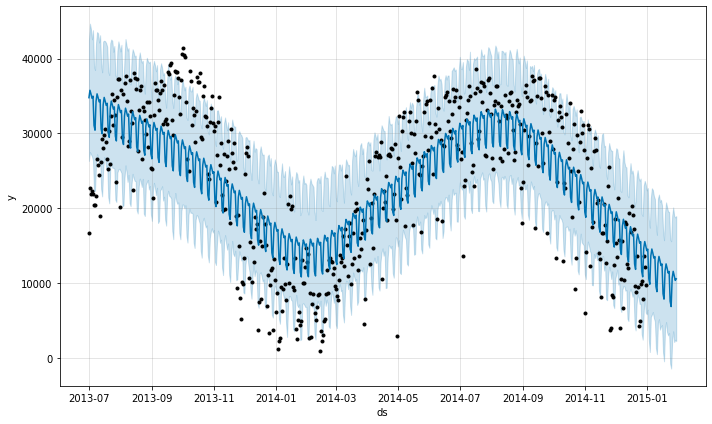

In [69]:
fig1 = model.plot(forecast)

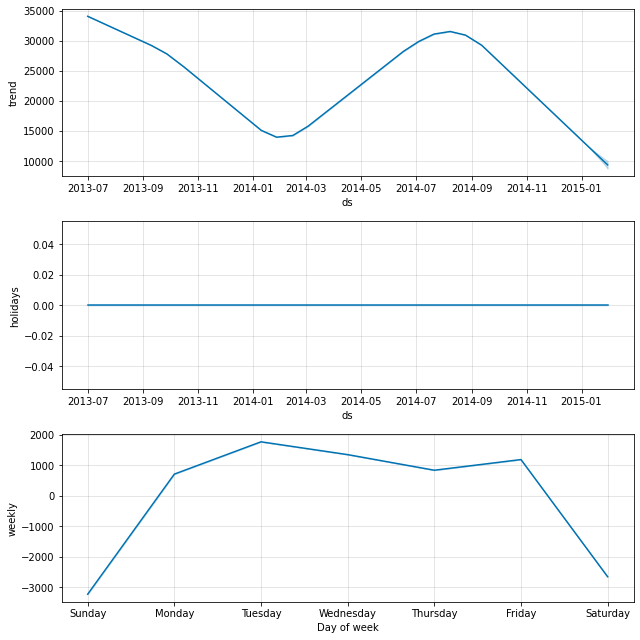

In [68]:
fig2 = model.plot_components(forecast)

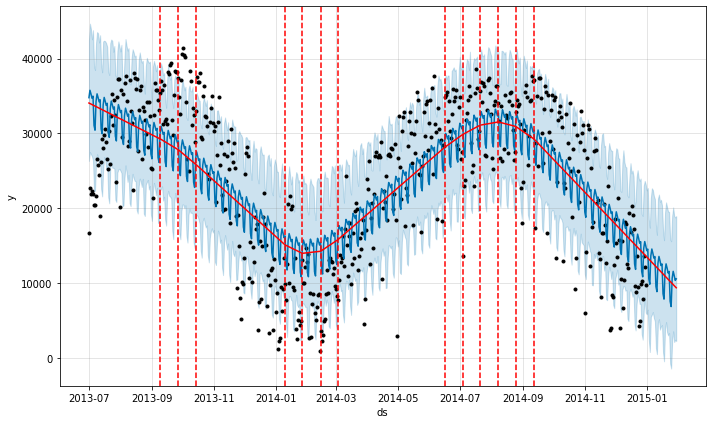

In [74]:
# Plot the model and forecast with additional trend analysis
fig3 = model.plot(forecast)
a = add_changepoints_to_plot(fig3.gca(), model, forecast)